# Vinos Blancos

In [329]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [125]:
# cargamos nuestro dataset
df = pd.read_csv('Datos_vinos_blancos.csv')

In [126]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,pricing,country
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,0.088,84.0,Budget,Italy
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,0.095,12.0,Expensive,Spain
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,0.101,54.0,Medium,Italy
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,0.099,88.0,Medium,Spain
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,0.099,80.0,Expensive,Spain


In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,0.103078,55.072683
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,0.024738,28.763988
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,-0.148345,10.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,0.094000,19.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,0.104000,60.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,0.114000,83.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,0.142000,99.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  success               4898 non-null   float64
 12  pricing               4898 non-null   object 
 13  country               4898 non-null   object 
dtypes: float64(12), object(2)
memory usage: 535.8+ KB


In [129]:
df.groupby(['country']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
country,,,,,,,,,,,,
Italia,6.704545,0.284432,0.372955,6.685227,0.055614,36.715909,137.340909,0.993892,3.188182,0.479545,0.101593,56.454545
Italy,6.846237,0.278108,0.332478,6.180719,0.045340,34.904440,136.819239,0.993891,3.189328,0.489772,0.103132,54.287104
Spain,6.865569,0.278258,0.335135,6.586420,0.046009,35.666734,139.843311,0.994160,3.187260,0.490100,0.103053,55.794697


In [130]:
df.groupby(['pricing']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
pricing,,,,,,,,,,,,
Budget,6.855623,0.279294,0.331264,6.386865,0.045349,35.300045,137.347728,0.994011,3.189429,0.492240,0.103986,55.683761
Expensive,6.868913,0.283035,0.335991,6.554530,0.048453,35.684032,142.051529,0.994328,3.193635,0.487576,0.100910,53.614949
Medium,6.846791,0.274573,0.336936,6.316685,0.044977,35.132812,137.798549,0.993900,3.184180,0.487997,0.103020,55.032924


# Ingenieria de Variable 

Para la columna 'country' y la variable italia e italy

In [131]:
italy_data = df['country'].str.contains('Ita', case = False)
italy_data

0        True
1       False
2        True
3       False
4       False
        ...  
4893    False
4894    False
4895     True
4896    False
4897    False
Name: country, Length: 4898, dtype: bool

In [132]:
# si una linea contiene ita, la convertimos en Espana
df['country'] = np.where(italy_data, 'Italy', df['country'])

<AxesSubplot:xlabel='country', ylabel='count'>

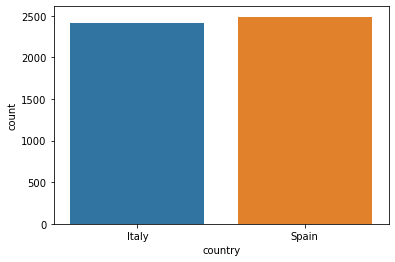

In [133]:
#despues de esta correcion, podemos mirar otra vez nuestro grafico de barras
sns.countplot(x='country', data=df)

<AxesSubplot:xlabel='pricing', ylabel='count'>

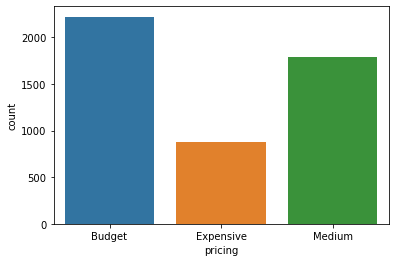

In [134]:
# seguimos ahora con un grafico de barras de los rango de precios
sns.countplot(x='pricing', data=df)

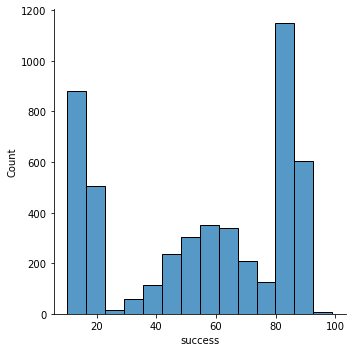

In [135]:
# y si quieremos ver frequencias en lugar de probabilidades
sns.displot(df['success'], kde = False)

<AxesSubplot:ylabel='residual sugar'>

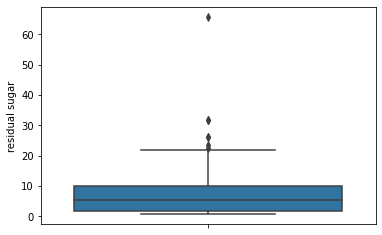

In [136]:
sns.boxplot(y = 'residual sugar', data = df)

### Ingenieria de Variables quitar los outliers
Tomare la informacion de la del profe y trato de ver la anomalia por encima del percentil 75 y del final de la caja que es el maximo.
Funciono, como veia que era por encima de los 26 le quite esos numeros que eran outliners.

Del aclcohol y del azucar residual. Con la ley de los signos,ej: Elimina  Variable > 26 = mayor a 26 . Variable < 0 = menor a 0

In [179]:
# vamos a identificar los percentiles los que estan  por encima de el percentil 75 y el maximo del extremo superior o de la caja.
# Aqui ver algo si me resulta
# y si queremos eliminar los valores anomalos positivos?
# cambio el signo de mayor a l > 26 , menor es < 0
out_sugar =  df['residual sugar'] > 26
df = df.drop(df[out_sugar].index)


<AxesSubplot:ylabel='alcohol'>

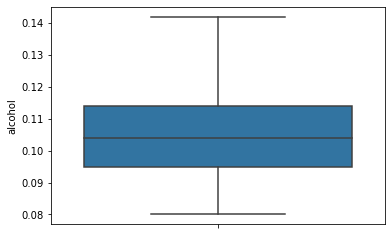

In [180]:
sns.boxplot(y = 'alcohol', data = df)

In [181]:
# y si queremos eliminar los valores anomalos negativos?
out_alcohol =  df['alcohol'] < 0
df = df.drop(df[out_alcohol].index)

<AxesSubplot:ylabel='alcohol'>

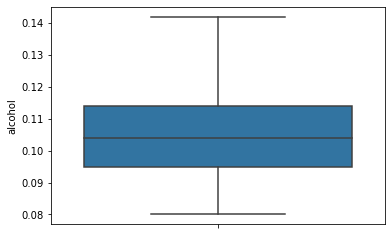

In [182]:
sns.boxplot(y = 'alcohol', data = df)

<AxesSubplot:ylabel='residual sugar'>

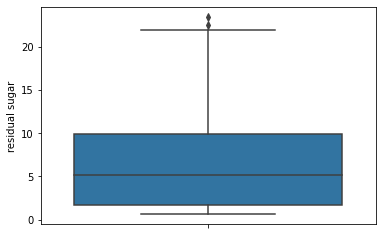

In [157]:
sns.boxplot(y = 'residual sugar', data = df)

In [183]:
# ahora vamos a ver si hay valores faltantes
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
success                 0
pricing                 0
country                 0
dtype: int64

In [184]:
df['residual sugar'].value_counts

<bound method IndexOpsMixin.value_counts of 0       20.7
1        1.6
2        6.9
3        8.5
4        8.5
        ... 
4893     1.6
4894     8.0
4895     1.2
4896     1.1
4897     0.8
Name: residual sugar, Length: 4849, dtype: float64>

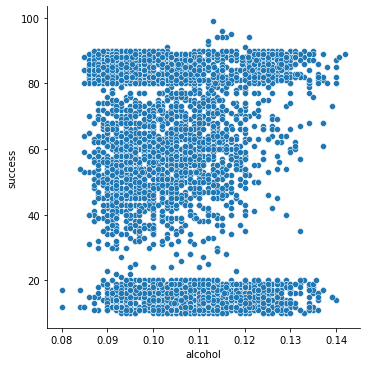

In [185]:
# Primero empezamos con el scatter plot
sns.relplot(x="alcohol", y="success", data=df)

<AxesSubplot:xlabel='alcohol', ylabel='success'>

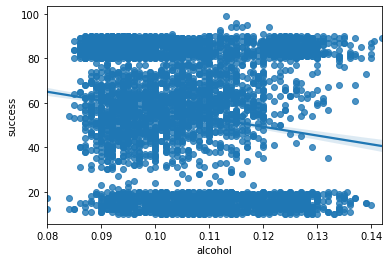

In [186]:
# ahora scatter plot mas linea, para identificar mejor las tendencias
# Aqui no dice nada de la relacion del alcohol y el exito, veremos que la azucar residual y la densidad
sns.regplot(x='alcohol', y="success", data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='success'>

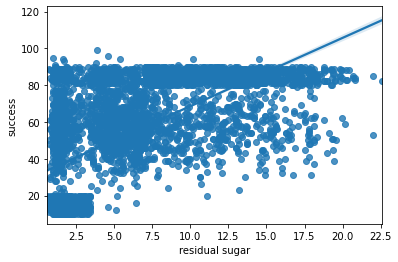

In [187]:
sns.regplot(x='residual sugar', y="success", data=df)

In [188]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
success                 0
pricing                 0
country                 0
dtype: int64

<AxesSubplot:xlabel='country', ylabel='success'>

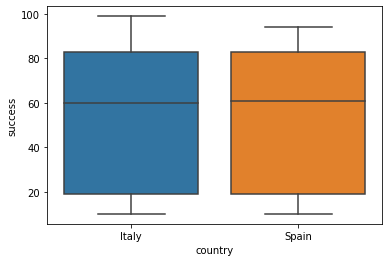

In [189]:
# mismas variables, con el boxplot lo vemos con mas detalles
sns.boxplot(x = 'country', y = 'success', data = df)

<AxesSubplot:xlabel='country', ylabel='residual sugar'>

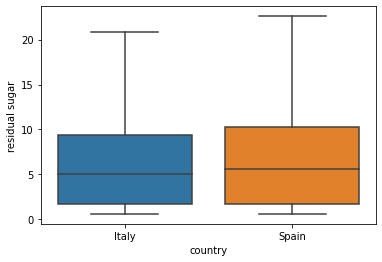

In [190]:
# mismas variables, con el boxplot lo vemos con mas detalles
# aqui detectamos el error de los valores atipicos o outliers
sns.boxplot(x = 'country', y = 'residual sugar', data = df)

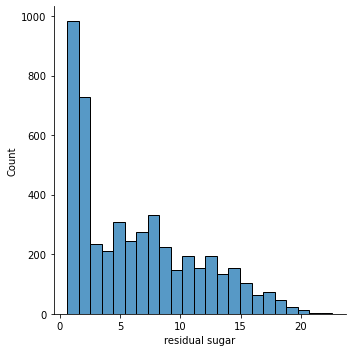

In [197]:
sns.displot(df['residual sugar'])

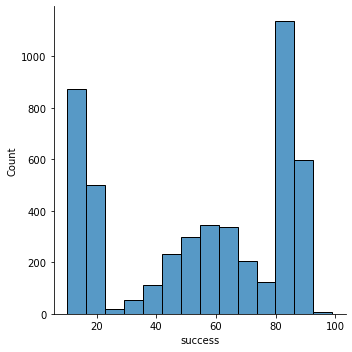

In [198]:
sns.displot(df['success'])

In [191]:
df.groupby(['country']).max()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,pricing
country,,,,,,,,,,,,,
Italy,11.8,0.93,1.66,20.8,0.290,289.0,440.0,1.00241,3.82,1.06,0.140,99.0,Medium
Spain,14.2,1.10,1.00,22.6,0.346,131.0,344.0,1.00182,3.80,1.08,0.142,94.0,Medium


In [192]:
df.groupby(['country']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
country,,,,,,,,,,,,
Italy,6.844358,0.278532,0.333066,6.206166,0.045520,34.983012,136.951762,0.993900,3.189316,0.489442,0.105458,54.372064
Spain,6.863367,0.277809,0.335095,6.526937,0.046037,35.670791,139.864503,0.994123,3.187363,0.490264,0.104802,55.781744


In [193]:
df.value_counts('country')

country
Spain    2465
Italy    2384
dtype: int64

<AxesSubplot:>

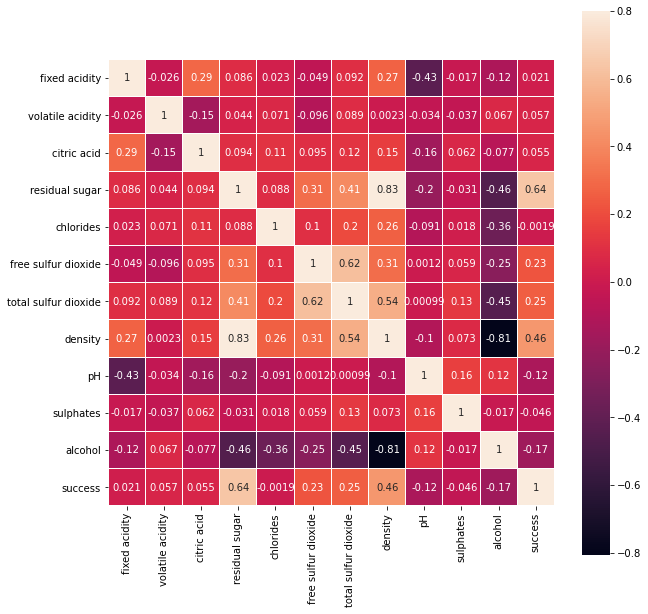

In [194]:
# y si queremos mirar todas las correlaciones?
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

### Aqui lo mas correlacionado para el exito y el sugar residual

# Este lo encontre en mis partes de mi curso de PUCMM, este te da un orden  

<AxesSubplot:>

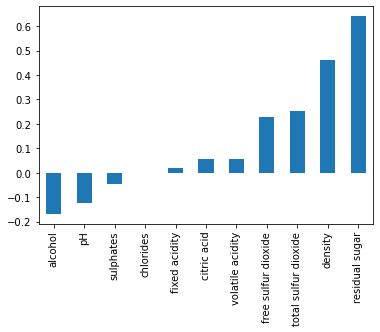

In [285]:
df.corr()['success'].drop('success').sort_values().plot(kind='bar')

# Analisis 

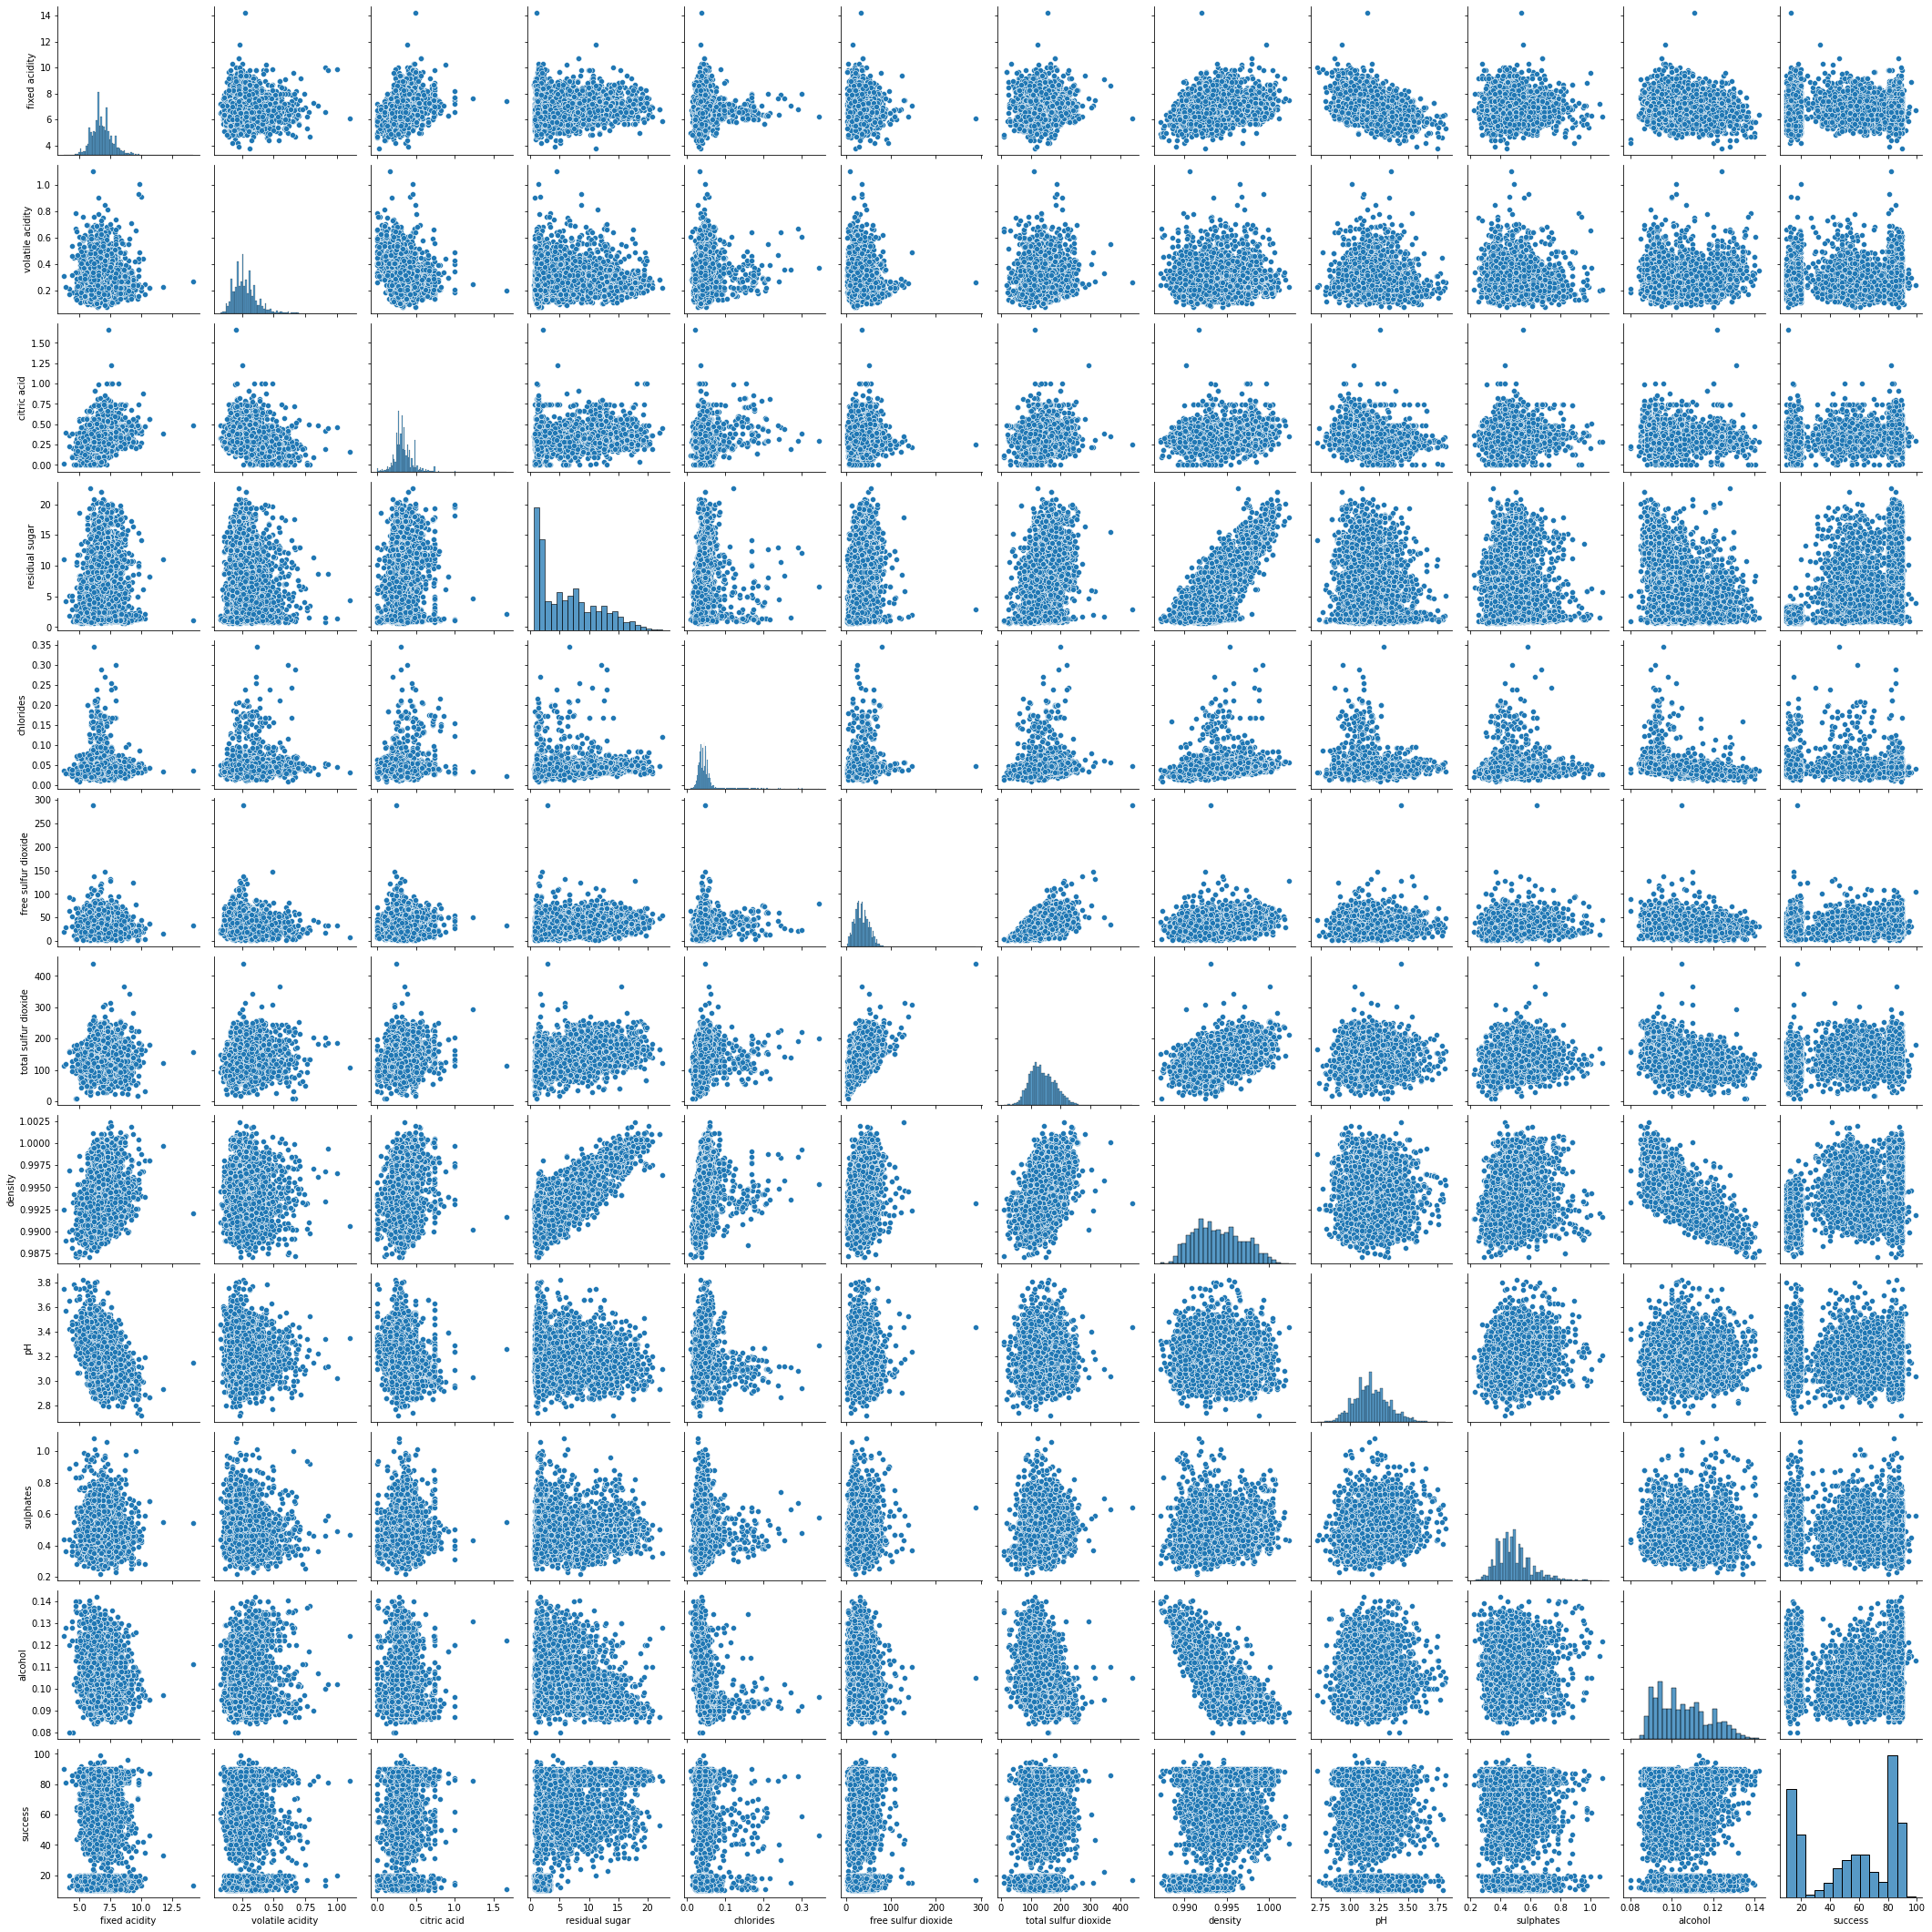

In [195]:
# y si queremos mirar todos los scatter plot?
sns.pairplot(df)

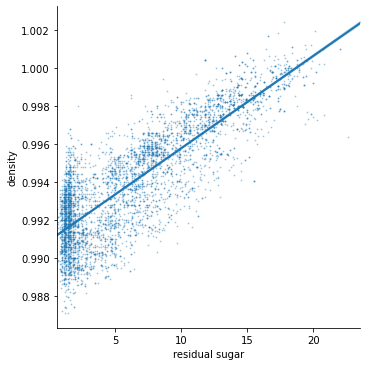

In [171]:
sns.lmplot(x='residual sugar', y="density", data=df, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

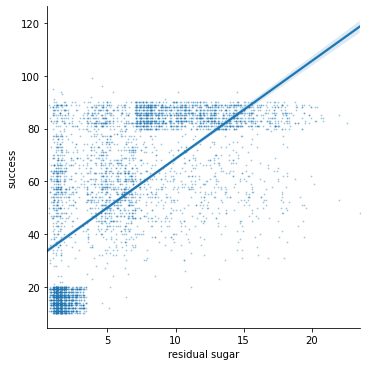

In [172]:
sns.lmplot(x='residual sugar', y="success", data=df, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

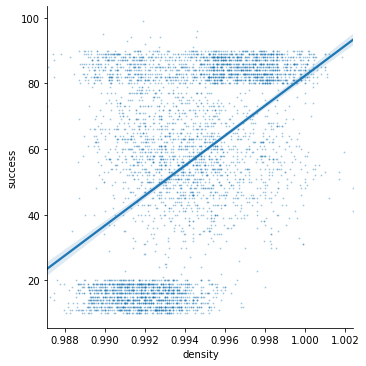

In [173]:
sns.lmplot(x='density', y="success", data=df, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

Text(0.5, 1.2, 'Más azucar residual , más éxito tanto en Italia como en España! \n  ¡Podemos predecir el éxito de un vino blanco!')

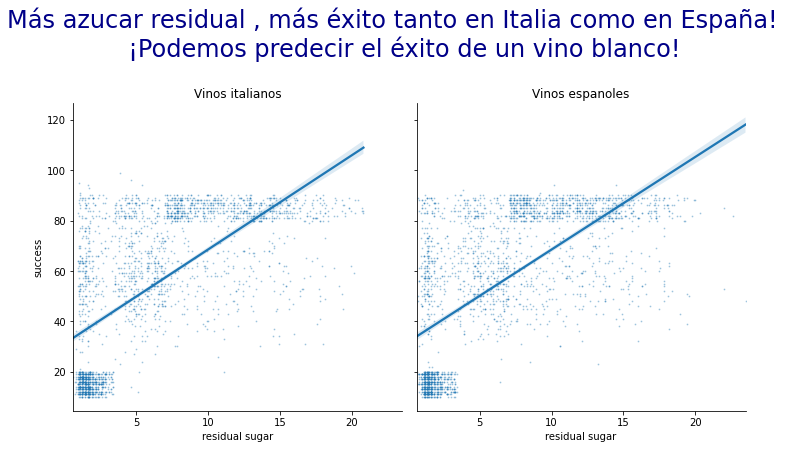

In [174]:
alcohol_success_plot = sns.lmplot(x='residual sugar', y="success", data=df, col = 'country', truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})
sns.despine()
axes = alcohol_success_plot.axes.flatten()
axes[0].set_title("Vinos italianos")
axes[1].set_title("Vinos espanoles")
vals = axes[1].get_xticks()
plt.suptitle('Más azucar residual , más éxito tanto en Italia como en España! \n  ¡Podemos predecir el éxito de un vino blanco!',fontsize=24,ha='center',va='top',color='#000088', y=1.2)

In [196]:
plt.savefig('alcohol_success_plot')

<Figure size 432x288 with 0 Axes>

# Modelo predictivo vamos a trabajar


In [254]:
# cargamos las funciones necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [255]:
X = df[['residual sugar']]
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.4,
                                                    random_state=101)


In [256]:
X_train

,residual sugar
4753,1.5
2445,2.6
4696,1.2
4088,3.8
1451,1.1
...,...
4117,18.1
4211,11.8
603,1.0
1372,8.2


In [257]:
y_test

3745    61.0
4820    50.0
2491    39.0
2380    13.0
4064    87.0
        ... 
629     10.0
493     20.0
364     14.0
1832    89.0
3216    16.0
Name: success, Length: 1940, dtype: float64

In [258]:
# escogemos como algoritmo una regresion linear
lr = LinearRegression()
# Entrenamos el modelo utilizando el train set
lr.fit(X_train,y_train)

LinearRegression()

In [259]:
# probamos ahora valores distintos para lograr esa predciccion, si la cantidad de azucar residual cuanto me evaluaran 
regr.predict([[11]])

/Users/jhonnydss/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.31597351])

In [260]:
# probamos ahora valores distintos para lograr esa predciccion, si la cantidad de azucar residual cuanto me evaluaran 
regr.predict([[18]])

/Users/jhonnydss/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([95.80789645])

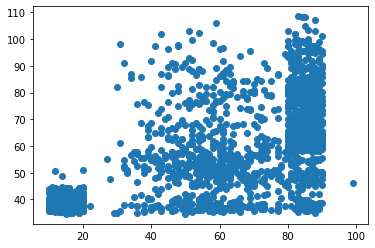

In [261]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

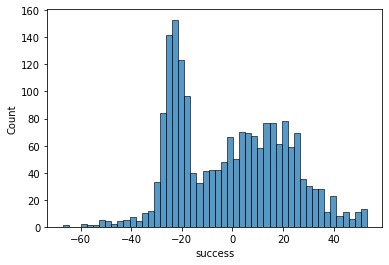

In [262]:
sns.histplot((y_test-predictions),bins=50);

## Metricas del Modelo

- **MAE** es el más fácil de entender, porque es el error promedio.
- **RMSE** es incluso más popular que MSE, porque RMSE se puede interpretar en las unidades "y".
- **MAPE** es el error porcentual, en este caso el modelo se equivoca un 64% lo cual no es muy bueno.

In [263]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MAPE:', mean_absolute_percentage_error(y_test,predictions))

RMSE: 21.861454657783923
MAE: 18.892701664383036
MAPE: 0.6482386240081118


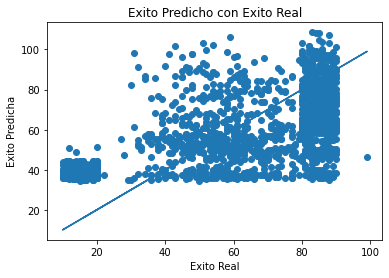

In [264]:
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test)
plt.title("Exito Predicho con Exito Real")
plt.xlabel("Exito Real")
plt.ylabel("Exito Predicha")
plt.show()


# Multivariable

In [265]:
X2 = df[['density', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']]
y2 = df['success']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                        y2, 
                                                        test_size = 0.2,
                                                        random_state = 3)
lr2 = LinearRegression()
# Entrenamos el modelo utilizando el train set
lr2.fit(X2_train,y2_train)

LinearRegression()

In [266]:
predictions2 = lr2.predict(X2_test)

In [267]:
print('RMSE:', np.sqrt(mean_squared_error(y2_test, predictions2)))
print('MAE:', mean_absolute_error(y2_test, predictions2))
print('MAPE:', mean_absolute_percentage_error(y2_test,predictions2))

RMSE: 21.95666074972967
MAE: 18.85568145827384
MAPE: 0.6305448950964113


### Aqui bajo un punto cada uno, con mas variable predictivas, mejor predice el modelo con las variables que tienen mejor correlacion. 

# Random Forest Regressor

Tome muchas cosas de mi curso de PUCMM el de la edad de Creahna y el Molusco, el otro de los vinos y pude aplicar las estrategias y creo que lo hice bien todo. 

In [275]:
# Ahora pruebamos un modelo de random forest en lugar de uno de linear regression.
# Empezamos con parametros fijos
X3 = df.drop(['country', 'pricing', 'success'], axis = 1)
y3 = df['success']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,
                                                        y3, 
                                                        test_size = 0.2,
                                                        random_state = 3)
rf = RandomForestRegressor(n_estimators = 5, max_features = 10)
# Entrenamos el modelo utilizando el train set
rf.fit(X3_train,y3_train)

RandomForestRegressor(max_features=10, n_estimators=5)

In [276]:
predictions3 = rf.predict(X3_test)

In [277]:
print('RMSE:', np.sqrt(mean_squared_error(y3_test, predictions3)))
print('MAE:', mean_absolute_error(y3_test, predictions3))
print('MAPE:', mean_absolute_percentage_error(y3_test,predictions3))

RMSE: 20.919433924244643
MAE: 15.807544673539518
MAPE: 0.50980616800112


In [278]:
# Aqui vemos la variable rf. es el ramdon forrest t vamos creando la importancia
feature_importance = pd.DataFrame({'variable':X3, 'FI': rf.feature_importances_})
feature_importance.sort_values('FI', ascending = False)

,variable,FI
3,"(r, e, s, i, d, u, a, l, , s, u, g, a, r)",0.622140
10,"(a, l, c, o, h, o, l)",0.060409
6,"(t, o, t, a, l, , s, u, l, f, u, r, , d, i, ...",0.042532
4,"(c, h, l, o, r, i, d, e, s)",0.041298
7,"(d, e, n, s, i, t, y)",0.038081
5,"(f, r, e, e, , s, u, l, f, u, r, , d, i, o, ...",0.035815
8,"(p, H)",0.035594
1,"(v, o, l, a, t, i, l, e, , a, c, i, d, i, t, y)",0.032941
9,"(s, u, l, p, h, a, t, e, s)",0.031789
0,"(f, i, x, e, d, , a, c, i, d, i, t, y)",0.029819


## Vamos con todas las variables ahora en Regresion pero Multivariable a ver

In [279]:
## Vamos con todas las variables ahora en Regresion pero Multivariable a ver
X4 = df.drop(['country', 'pricing', 'success'], axis = 1)
y4 = df['success']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,
                                                        y4, 
                                                        test_size = 0.2,
                                                        random_state = 3)
lr3 = LinearRegression()
# Entrenamos el modelo utilizando el train set
lr3.fit(X4_train,y4_train)

LinearRegression()

In [280]:
predictions4 = lr3.predict(X4_test)

In [281]:
print('RMSE:', np.sqrt(mean_squared_error(y4_test, predictions4)))
print('MAE:', mean_absolute_error(y4_test, predictions4))
print('MAPE:', mean_absolute_percentage_error(y4_test,predictions4))

RMSE: 21.915853548239788
MAE: 18.774828276231325
MAPE: 0.6313786655624491


# El Modelo que mejor predice es el Ramdon Forest, por el MAE y MAPE 

### Vamos ahora a convertir algunas de las variables a numericas y entrar en un modelo de clasificacion a ver si 

In [293]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [294]:
X5 = df.drop(['pricing', 'country'], axis = 1)
y5 = df['country']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,
                                                        y5, 
                                                        test_size = 0.2,
                                                        random_state = 3)

In [295]:
nb = GaussianNB()
nb.fit(X5_train,y5_train)

GaussianNB()

In [296]:
predicciones = nb.predict(X5_test)

In [297]:
print(classification_report(y5_test,predicciones))

              precision    recall  f1-score   support

       Italy       0.46      0.61      0.53       451
       Spain       0.53      0.39      0.45       519

    accuracy                           0.49       970
   macro avg       0.50      0.50      0.49       970
weighted avg       0.50      0.49      0.48       970



In [299]:
print(confusion_matrix(y5_test,predicciones))

[[274 177]
 [318 201]]


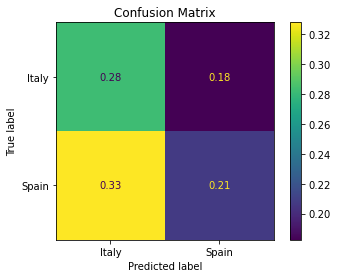

In [298]:
# Esto lo traje del analisis de sentimiento de los reviews 
#Hay que abrir o importar la libreria 
#Print a confusion matrix for the model
ConfusionMatrixDisplay.from_estimator(nb,X5_test,y5_test,normalize='all')
plt.title('Confusion Matrix')
plt.show()

In [305]:
## Aqui elegimos las mejores 5 Variables que Predicen el Modelo

In [306]:
nb.classes_

array(['Italy', 'Spain'], dtype='<U5')

# Con las mejores 5, El modelo mejora un poco

In [311]:
from sklearn.feature_selection import SelectKBest

#definimos una variable con el parametro de las k cantidad de variables mejores que queremos
top_5 = SelectKBest(k=5)
#ajustamos el algoritmo a la data dividad por variables predictivas y variable objetivo
X_new = top_5.fit_transform(X5, y5)
#definimos obtenemos los nombres de las variables seleccionadas por el algoritmo
seleccionadas = top_5.get_support(indices=True)

print(X5.columns[seleccionadas])

Index(['residual sugar', 'total sulfur dioxide', 'density', 'alcohol',
       'success'],
      dtype='object')


In [314]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X_new, y5, test_size=0.30, random_state=101)

nb_top = GaussianNB()
nb_top.fit(X5_train,y5_train)
predicciones_top = nb_top.predict(X5_test)

In [316]:
print(classification_report(y5_test,predicciones_top))

              precision    recall  f1-score   support

       Italy       0.49      0.57      0.53       689
       Spain       0.55      0.47      0.51       766

    accuracy                           0.52      1455
   macro avg       0.52      0.52      0.52      1455
weighted avg       0.52      0.52      0.52      1455



In [317]:
X5.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'success'],
      dtype='object')

In [318]:
X5.columns[seleccionadas]

Index(['residual sugar', 'total sulfur dioxide', 'density', 'alcohol',
       'success'],
      dtype='object')

In [327]:
df.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,pricing,country
1377,6.9,0.28,0.41,1.7,0.05,10.0,136.0,0.993,3.16,0.71,0.114,64.0,Budget,Spain


In [321]:
#                  ['residual sugar', 'total sulfur dioxide', 'density', 'alcohol', 'success']
print(nb_top.predict([[15,              100,                    0.90,       0.11,         80]]))

['Italy']


In [328]:
#                  ['residual sugar', 'total sulfur dioxide', 'density', 'alcohol', 'success']
print(nb_top.predict([[10,              130,                    0.80,       0.12,         60]]))

['Italy']
